<a href="https://colab.research.google.com/github/AkiraNom/data-analysis-notebook/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Analysis

Cusotmer data was download from the kaggle: [kaggle_dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

The dataset contains the basic customer infomation:**ID**, **age**, **gender**, **annual income**, and **spending score** assigned by the mall based on customer behavior and spending nature



This notebook includes:
  1. customr segmentation analysis using unsupervised learning, k-Means clutering algorithm
  2. discussion an effective market strategy based on the cluster.  

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('./sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

# pre-processling data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# check duplication of customer ID which has to be unique
print('CustomerID_duplicated:{}'.format(df.duplicated("CustomerID").any()))

CustomerID_duplicated:False


In [6]:
# view data statistics
display(df.describe())
display(df.describe(exclude='number'))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Visualize the data distribution

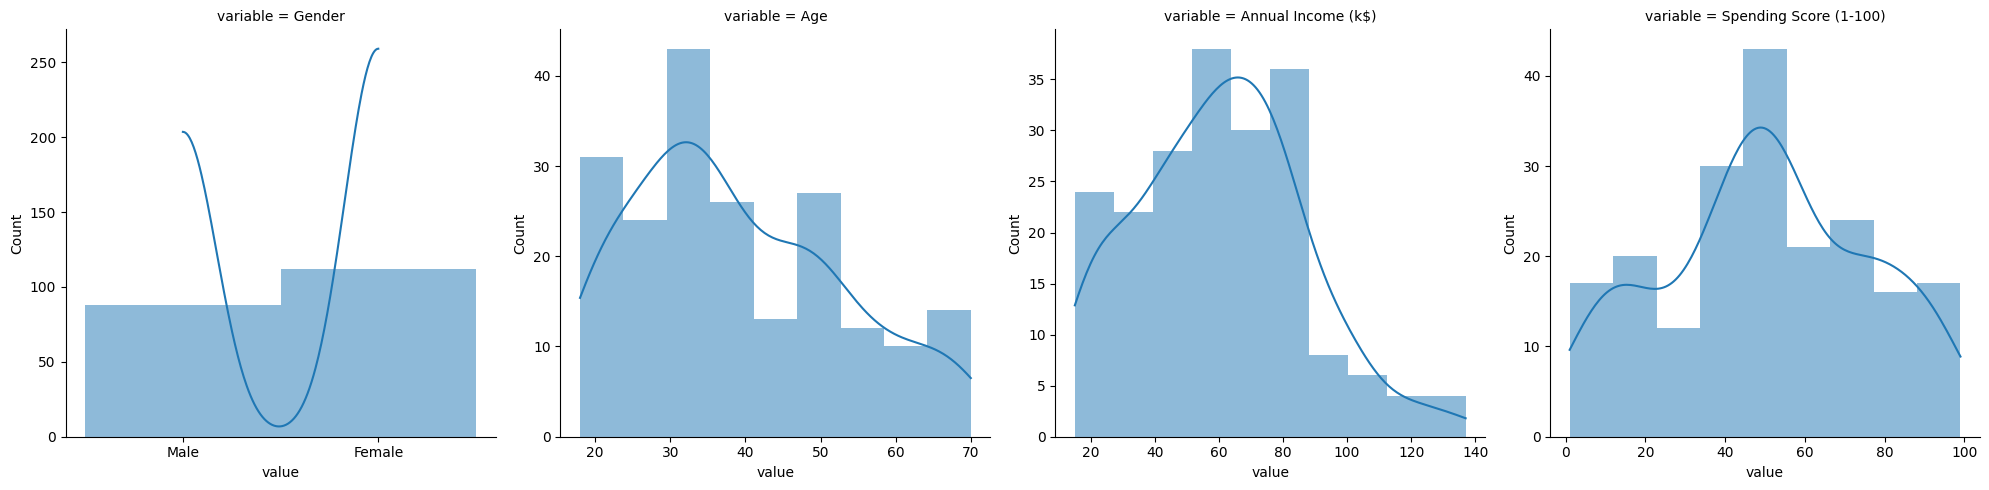

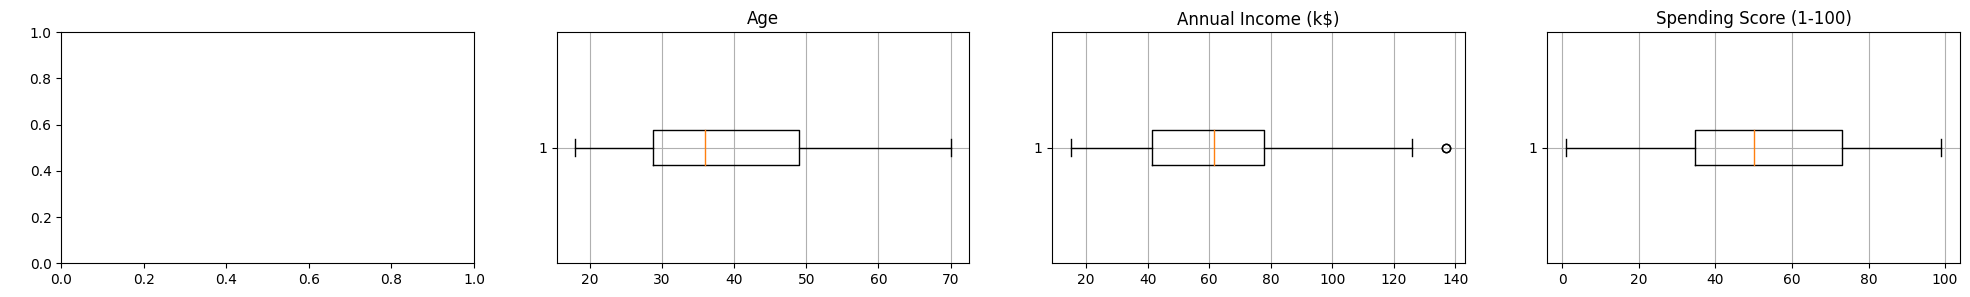

In [8]:
#remove the customerID and reshape the data structure
df_melt = df.drop(["CustomerID"], axis=1).melt()
#print(df_melt)

#draw histogram and KDE
fig = sns.FacetGrid(df_melt, col="variable", height=5, sharex=False, sharey=False)
fig.map(sns.histplot, "value", linestyle="None", alpha=0.5, kde=True)

#get col names for the graph title
Age = df.columns.values[2]
Income = df.columns.values[3]
Score = df.columns.values[4]

#draw box plot
fig = plt.figure(figsize=(24.5,3))
ax1 = fig.add_subplot(1, 4, 1) # empty, but to vertically align the two plots
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax2.set_title(Age)
ax3.set_title(Income)
ax4.set_title(Score)

ax1.set_ylabel(" ")

ax2.boxplot(df[Age], vert=False)
ax3.boxplot(df[Income], vert=False)
ax4.boxplot(df[Score], vert=False)

ax2.grid()
ax3.grid()
ax4.grid()

In [9]:
# convert categorical data to numeric data (integer encoding)
df=df.replace(({'Male':0, 'Female':1}))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


<Axes: >

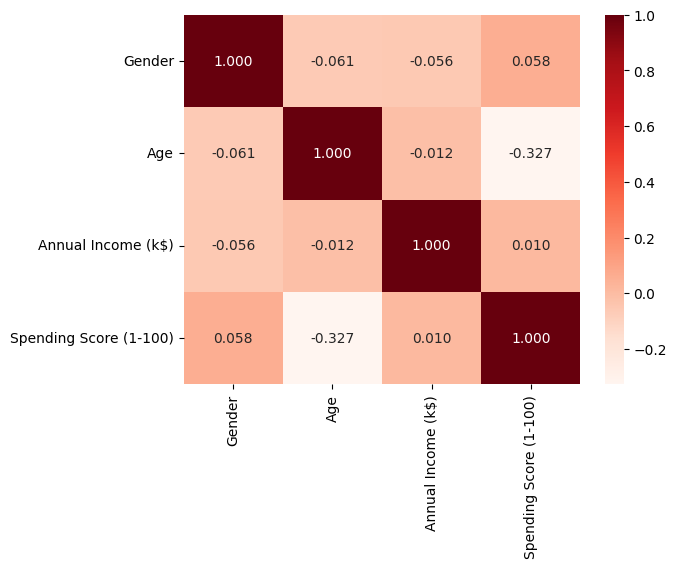

In [10]:
#inspect correlation coefficient
sns.heatmap(df.drop(["CustomerID"], axis=1).corr(), annot=True, fmt=".3f", cmap="Reds")

# K-means clustering (non-hierarchical clustering)

## Clustering with 2 features (Age, and Annual income)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-df56d5b5c54b>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))


Text(0, 0.5, 'Annual Income (k$)')

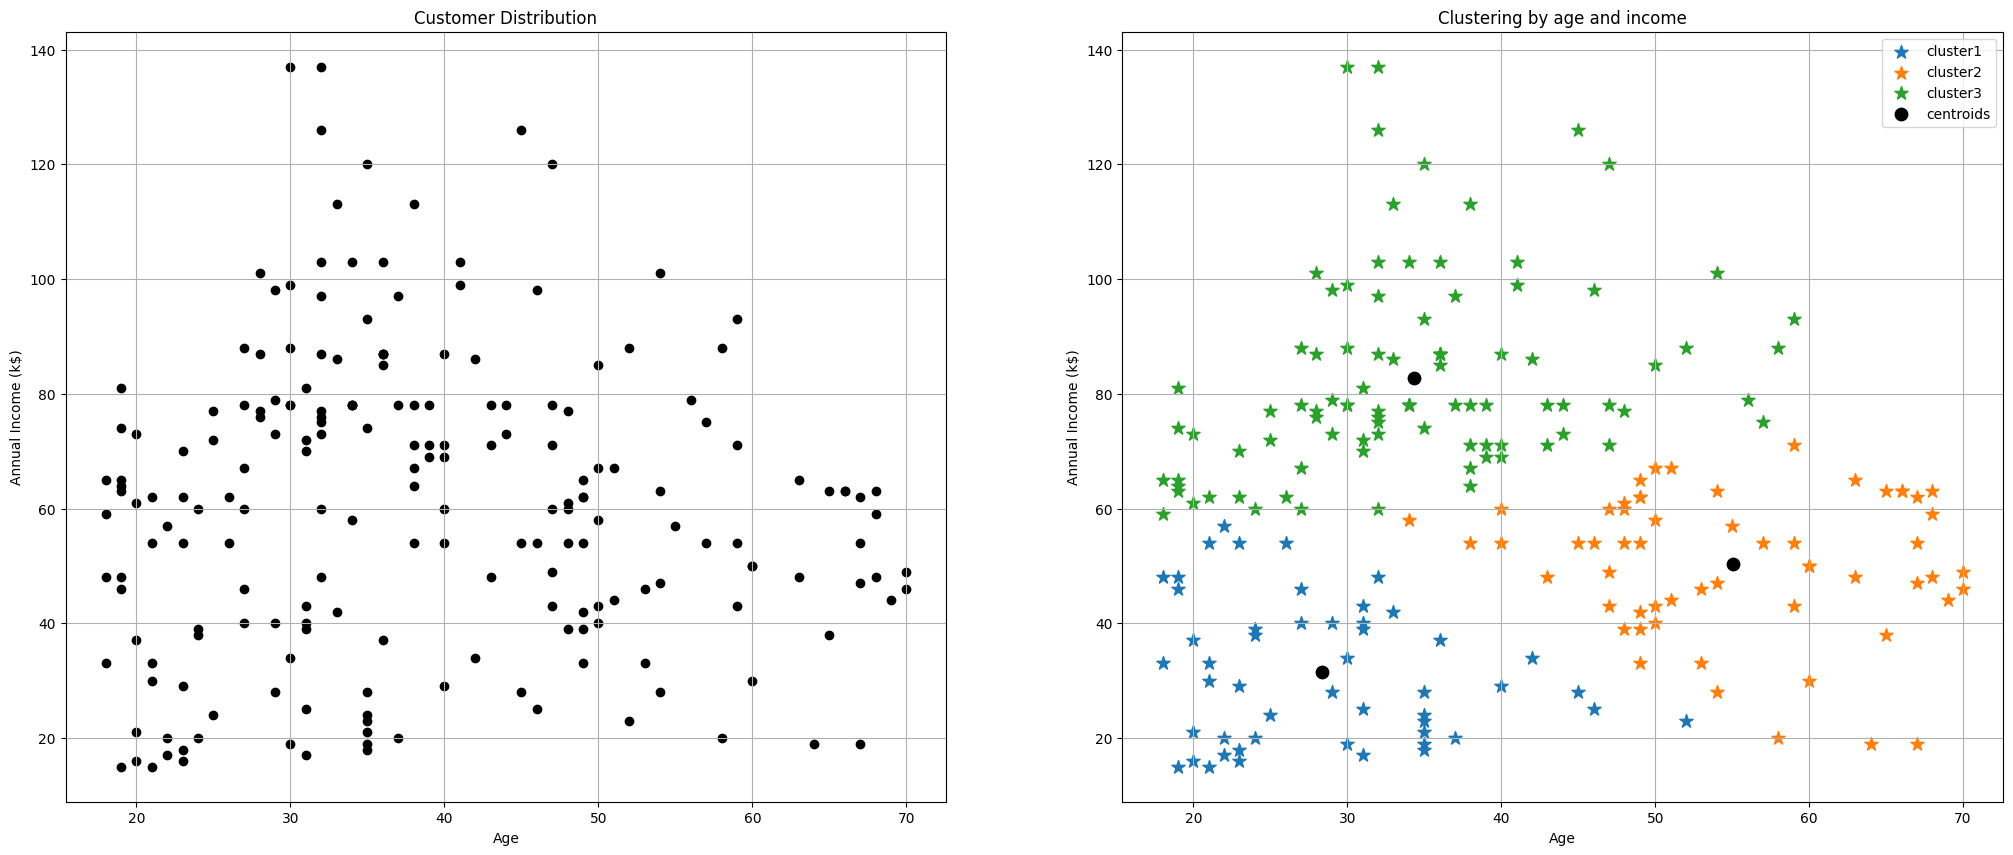

In [11]:
# clutering base on 2 features (age and annual income)
X = df.loc[:,[Age,Income]].values


# create a model with n_clusters=3
# n_clusters will be tweeked later using sum of squared erros of prediction (SSE)
km = KMeans(n_clusters=3, init="random", random_state=0)

# assign the cluster number to each sample
y_km = km.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.set_title("Customer Distribution")
ax1.scatter(X[:, 0], X[:, 1], c="black")
ax1.grid()
ax1.set_xlabel(Age)
ax1.set_ylabel(Income)

ax2.set_title("Clustering by age and income")
for n in range(3):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))

#display a centroid of each cluster
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Age)
ax2.set_ylabel(Income)

In [12]:
# sample counts in each cluster
y = pd.DataFrame(km.predict(X))
for a, b in enumerate(y.value_counts().sort_index()):
   print("cluster{}:{}".format(a+1,b))

cluster1:50
cluster2:58
cluster3:92


In [13]:
# help(km)

sklern.cluster.KMeans has
> attributes: <br>
> inertia_: float <br>
> Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
  
It is described as following:
\begin{gather*}
\sum\limits_{i=1}^n\min_{\mu_j \in C}(||x_i-\mu_{j}||^2)
\end{gather*}

The k-Means algorithm clusters data with n_clusters so that inertial or within-cluster sum-of-suares will be minimized. More details [here](https://scikit-learn.org/stable/modules/clustering.html)

Comapring inertia, you could determine a value of the n_clusters.

Elbow plot is a way to visualize the correlation between SSE and number of clusters (k).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

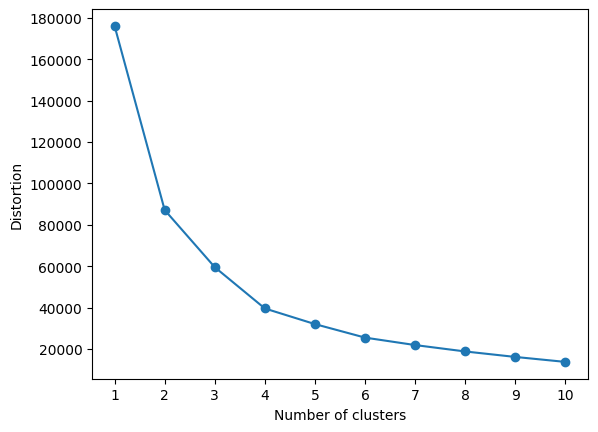

In [14]:
# Elbow plot is one way to visualize SSE and k.

distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# Elbow plot
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

Until k=4, SSE is greatly reduced. Compare how clustering will change when k=4 comared with k=3   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-c11c71b5295f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-c11c71b5295f>:25: UserWarning: *c* argum

Text(0.5, 1.0, 'cluster = 4')

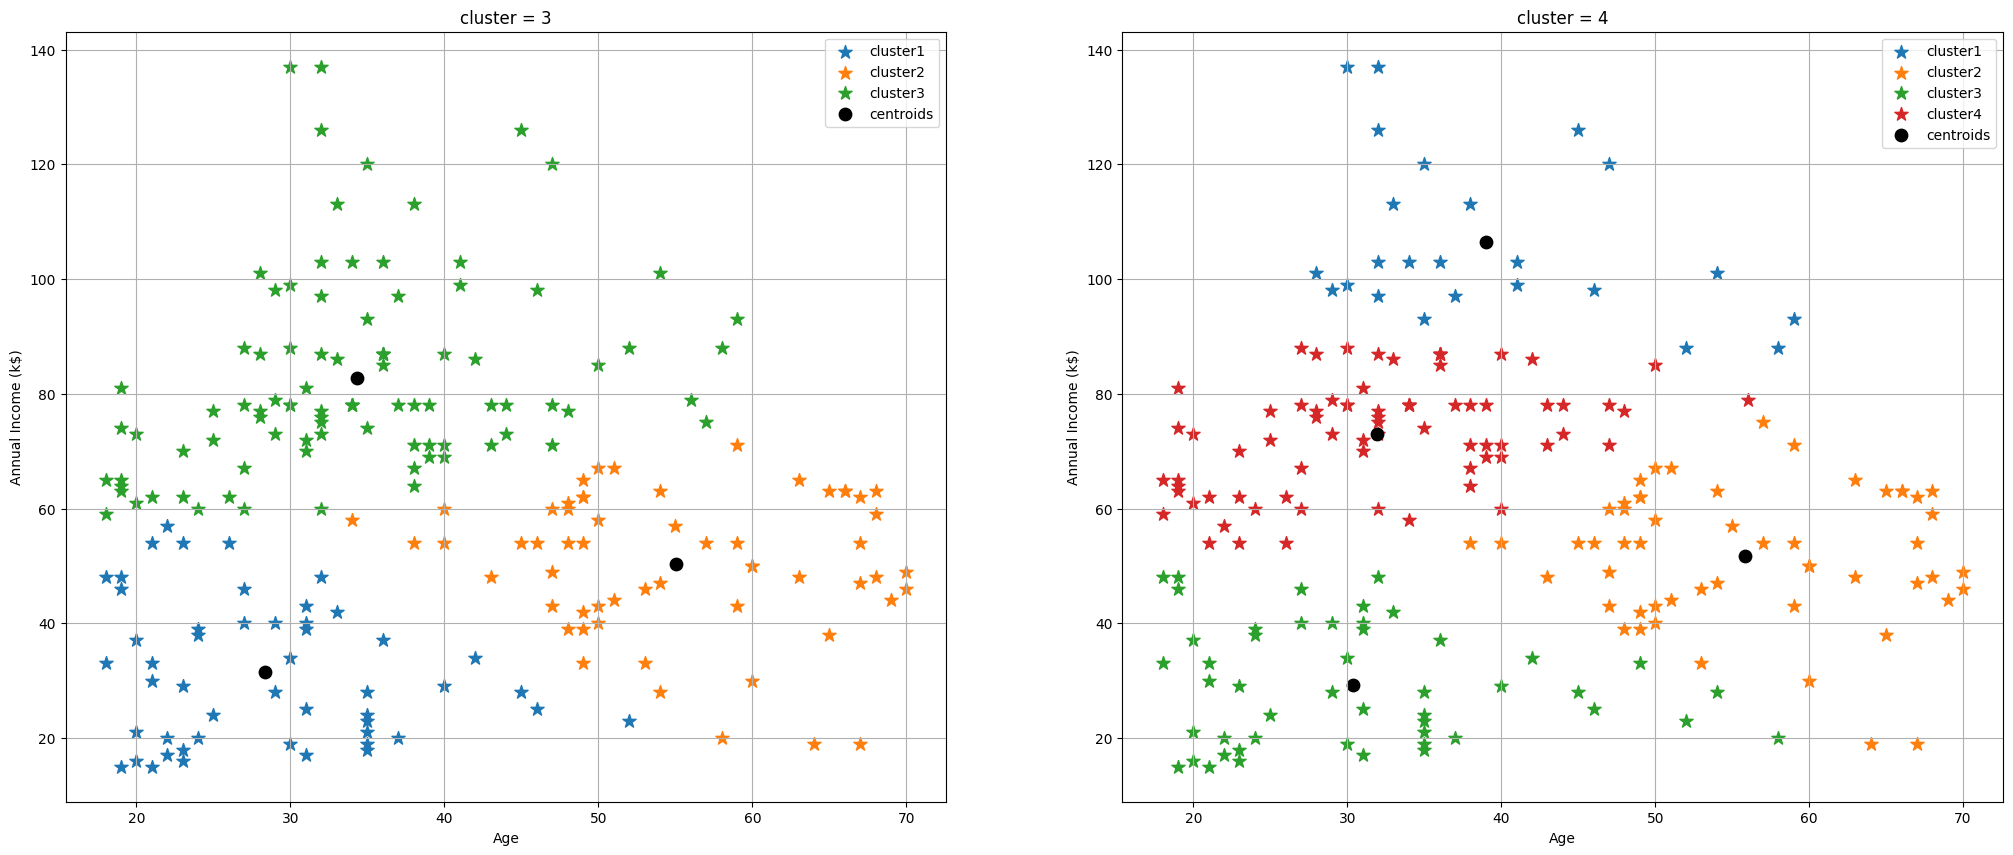

In [15]:
# comapring the graphs of n_clusters=3 and n_clusters=4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# model with n_clusters=3
km = KMeans(n_clusters=3, init="random", random_state=0)
y_km = km.fit_predict(X)

for n in range(3):
    ax1.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))

#plot a centroid
ax1.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax1.legend()
ax1.grid()
ax1.set_xlabel(Age)
ax1.set_ylabel(Income)
ax1.set_title("cluster = 3")

# model with n_clusters = 4
km = KMeans(n_clusters=4, random_state=0)
y_km = km.fit_predict(X)

for n in range(4):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))

#plot a centroid
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Age)
ax2.set_ylabel(Income)
ax2.set_title("cluster = 4")

Cluter 3 on the left graph (green stars) is further divided into 2 clusters (cluster 1 and cluster 4) on the right graph.

In [16]:
print("add a cluster id")
# inspect a table
X = df.loc[:,["CustomerID", Age,Income, Score]]
X["cluster_id"] = y_km+1
X

クラスター番号をDFに紐づけ


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,19,15,39,3
1,2,21,15,81,3
2,3,20,16,6,3
3,4,23,16,77,3
4,5,31,17,40,3
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,1
198,199,32,137,18,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


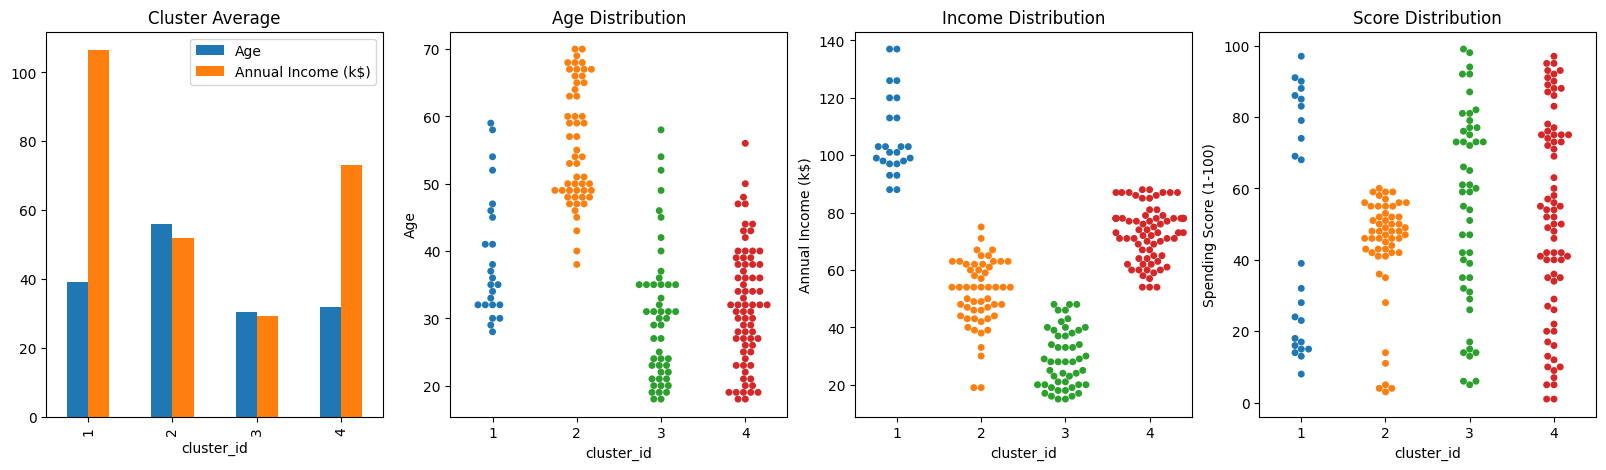

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

result = X.groupby("cluster_id").mean().reset_index()
result.plot(x="cluster_id", y=[Age, Income], kind="bar", ax=ax[0])
ax[0].set_title("Cluster Average");

# swarmplot for age distribution by cluster id
sns.swarmplot(data=X, x='cluster_id', y=Age, hue='cluster_id',palette='tab10',legend=False, ax=ax[1])
ax[1].set_title('Age Distribution');
# swarmplot for income distriubtion by cluster id
sns.swarmplot(data=X, x='cluster_id', y=Income, hue='cluster_id',palette='tab10', legend=False, ax=ax[2])
ax[2].set_title('Income Distribution');
# warmplto for shopping score distribution by cluster id
sns.swarmplot(data=X, x='cluster_id', y=Score, hue='cluster_id',palette='tab10', legend=False, ax=ax[3])
ax[3].set_title('Score Distribution');

## Clustering with annual income and shopping score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

SSE (Distortion) and No. of clusters (k)


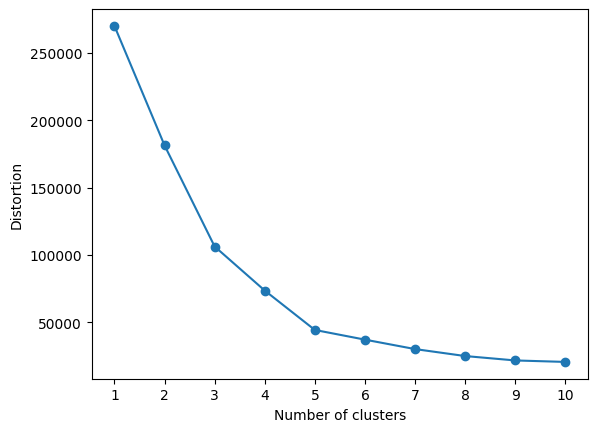

In [20]:
#clustering with annula income and shopping score
X = df.loc[:,[Income, Score]].values

# evaluate n_clusters with an elbow plot
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# Elbow plot
print("SSE (Distortion) and No. of clusters (k)")
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-e5ad492e0ac3>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))


Text(0, 0.5, 'Spending Score (1-100)')

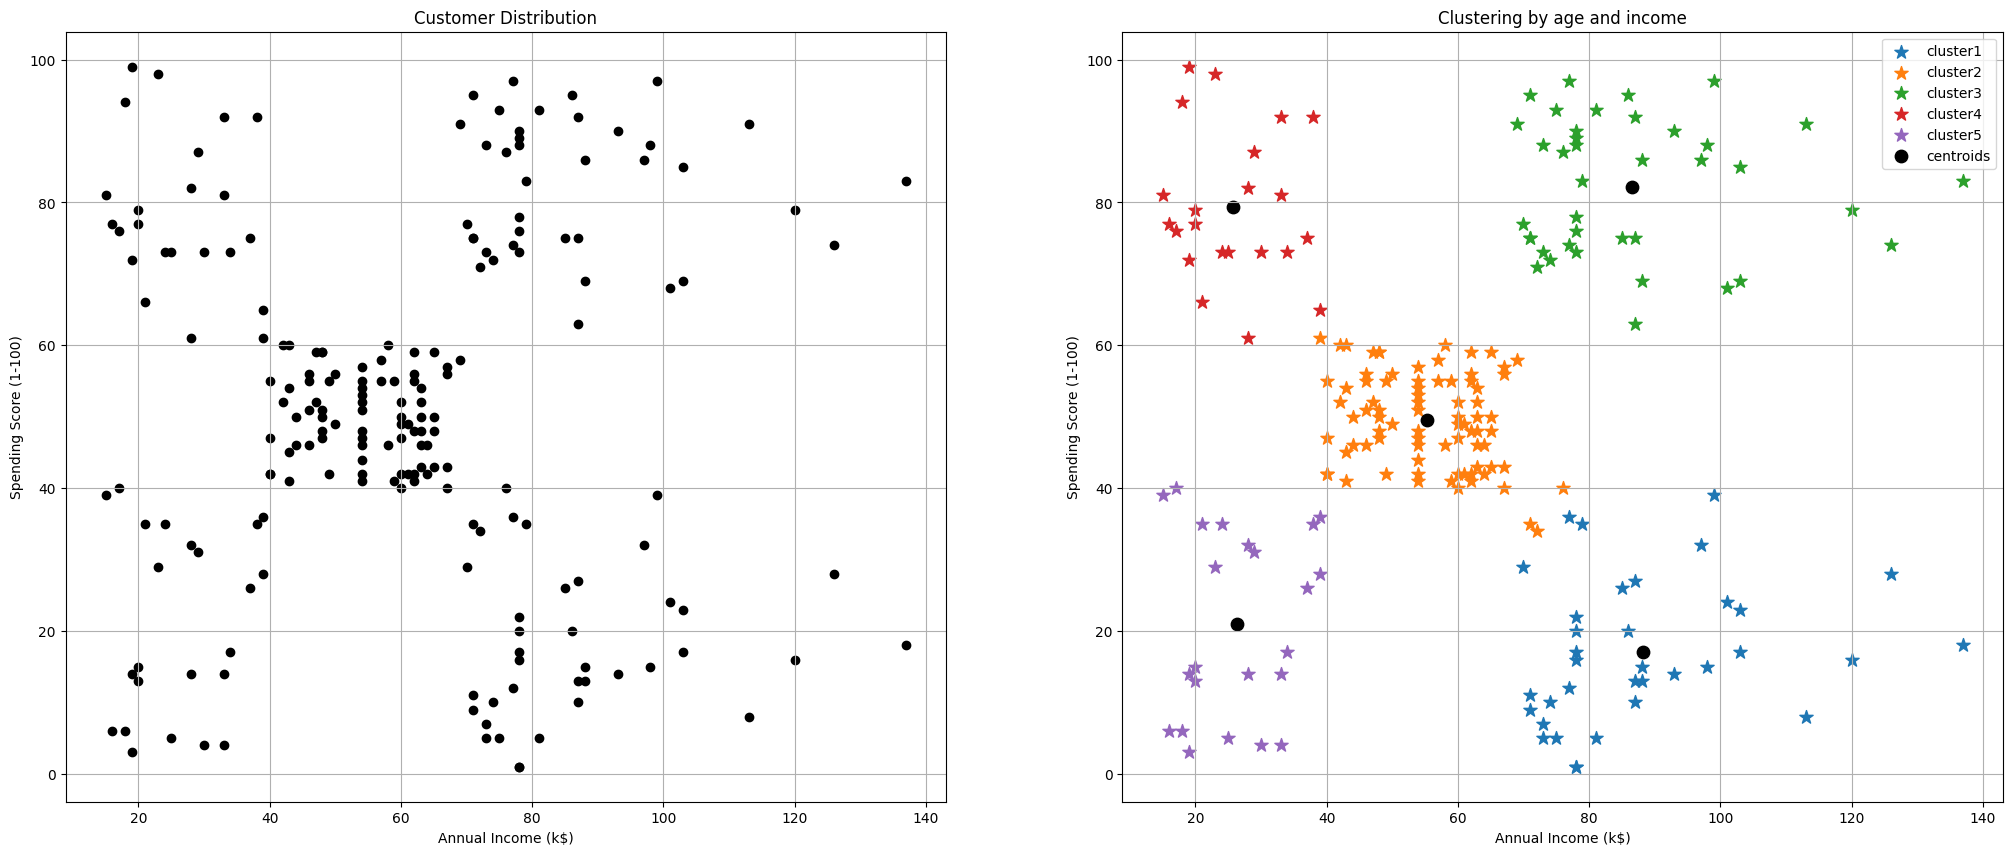

In [21]:
# build a model with n_clusters = 5
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# scatter plot
ax1.set_title("Customer Distribution")
ax1.scatter(X[:, 0], X[:, 1], c="black")
ax1.grid()
ax1.set_xlabel(Income)
ax1.set_ylabel(Score)

# scatter plot masked by cluster id
ax2.set_title("Clustering by age and income")
for n in range(5):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))

#set a centroid
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Income)
ax2.set_ylabel(Score)

In [22]:
# counts in each cluster
y = pd.DataFrame(km.predict(X))
for a, b in enumerate(y.value_counts().sort_index()):
   print("cluster{}:{}".format(a+1,b))

cluster1:35
cluster2:81
cluster3:39
cluster4:22
cluster5:23


**Interpretation of graph:**<br>
><font color='blue'>cluster 1 blue (35)</font>: high income but low score  
 <font color='orange'>cluster 2 oragne (81)</font>: middle income and middle shopping score    
<font color='green'>cluster 3 green (39)</font>: high income and high score  
<font color='red'>cluster 4 red (22)</font>: low income but high score  
<font color='purple'>cluster 5 purple (23)</font>: low income and low score  

Based on the resut, priority may be given to cluster 3 -> 4 -> 2 -> 1 -> 5

# Hierarchial Clustering (dendrogram)

The advantage of hierachial clustering (dendrogram) is **visual clarity**. A dendrogram can clearly demonstrate hierarchical clustering relationships and complex structures

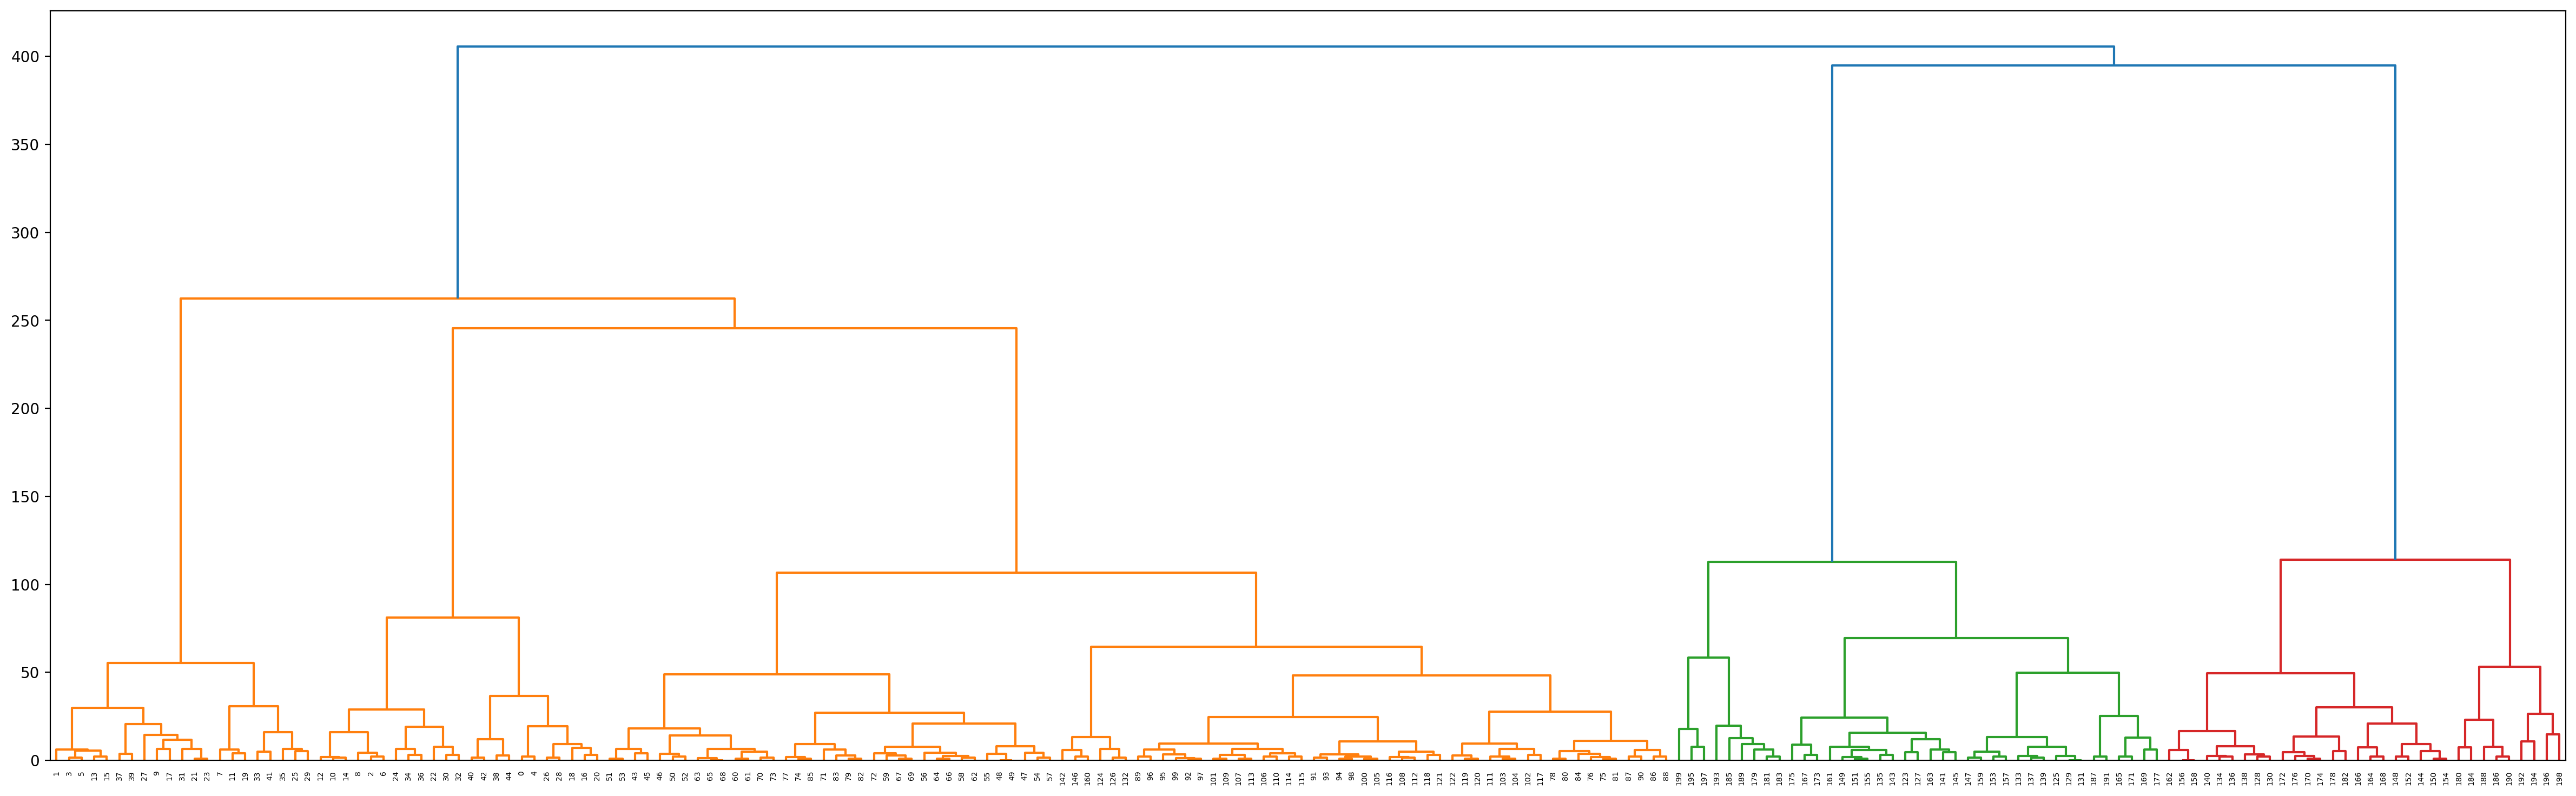

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
df_link = df.loc[:,[Income, Score]]

linkage_result = linkage(df_link, method="ward", metric="euclidean")
fig = plt.figure(num=None, figsize=(30, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df_link.index)
plt.xticks(rotation=90)
plt.show()

#save fig
# fig.savefig("dendrogram.png")

Now you need to think how to split them.

<ipython-input-27-c1baae586eb8>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(df_link[df_link["l_score"] == n][Income], df_link[df_link["l_score"] == n][Score], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))
<ipython-input-27-c1baae586eb8>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))

Text(0, 0.5, 'Spending Score (1-100)')

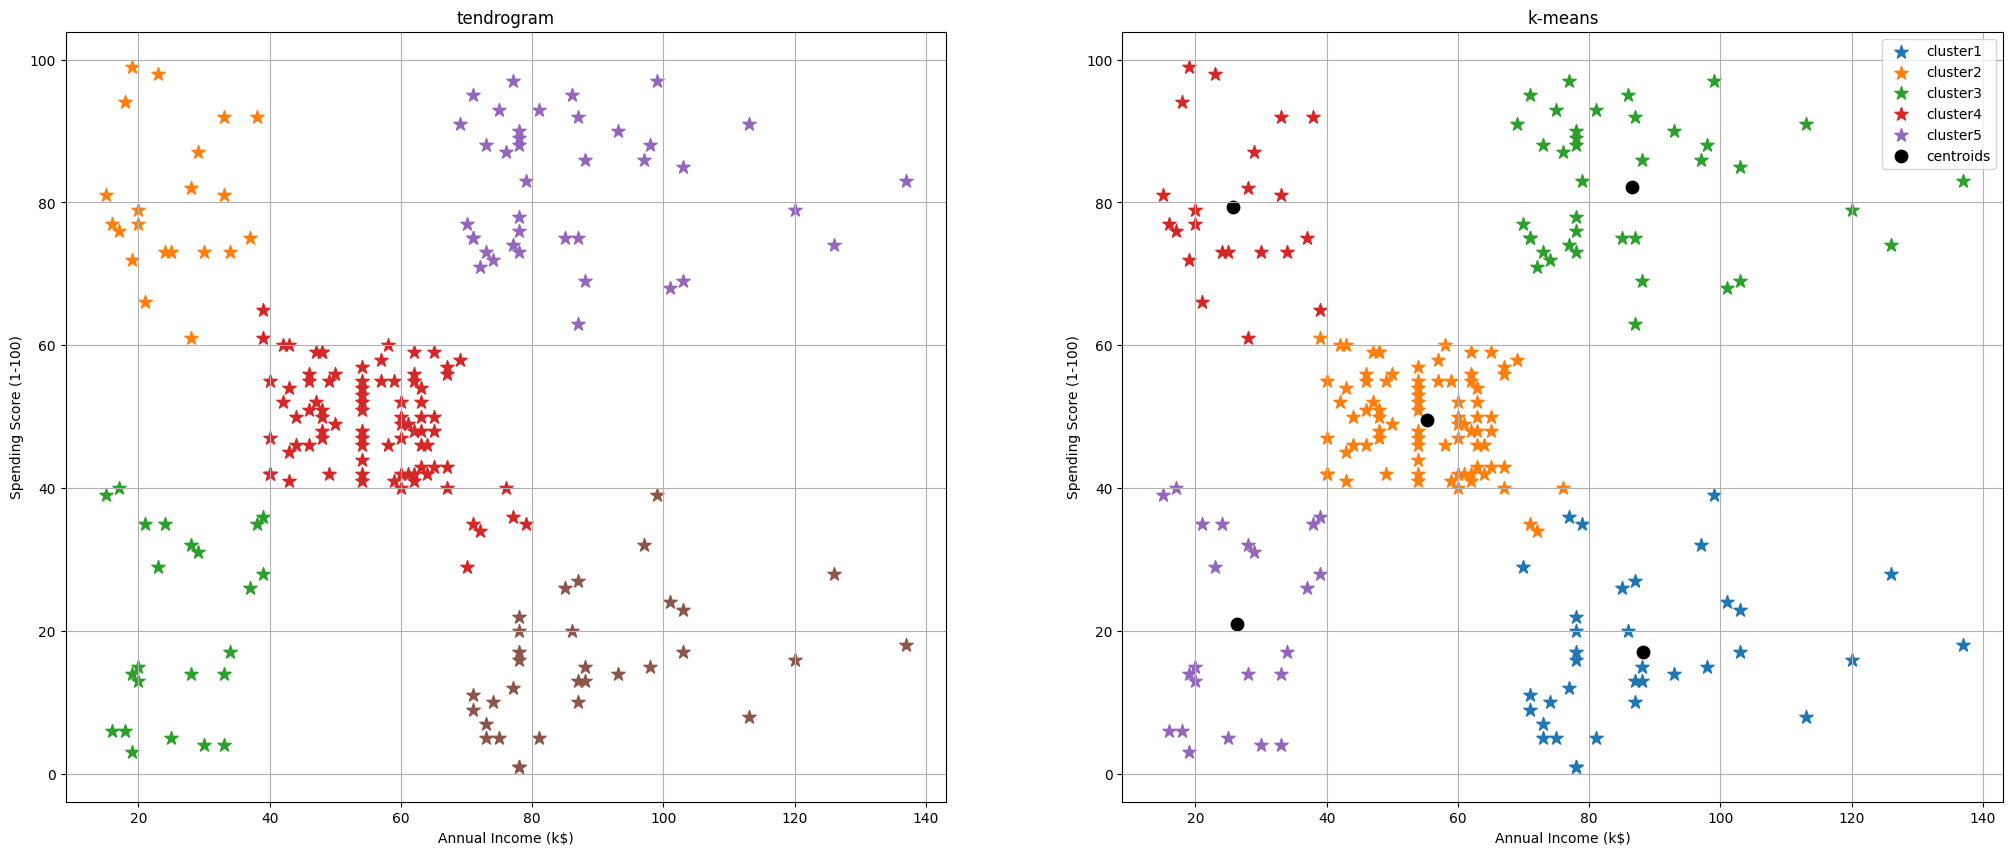

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linkage_result
t = 0.5*max(linkage_result[:,2])
c = fcluster(linkage_result, t, criterion="distance")

df_link["l_score"] = c

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25, 10))

# plot clusters with dendrogram
ax1.set_title("tendrogram")
for n in range(6):
    #plt.scatter(df_link[Income], df_link[Score])
    ax1.scatter(df_link[df_link["l_score"] == n][Income], df_link[df_link["l_score"] == n][Score], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))
ax1.grid()
ax1.set_xlabel(Income)
ax1.set_ylabel(Score)

# plot clusters with k-means
ax2.set_title("k-means")
for n in range(5):
    ax2.scatter(X[y_km == n, 0], X[y_km == n, 1], s=100, c=cm.tab20(n*2), marker="*", label="cluster"+str(n+1))

#set a controid
ax2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, marker="o", c="black", label="centroids")
ax2.legend()
ax2.grid()
ax2.set_xlabel(Income)
ax2.set_ylabel(Score)

# k-Means Clustering with 3 features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

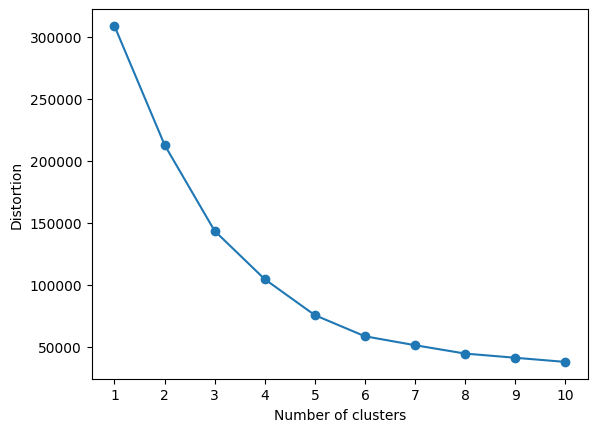

In [30]:
#clutering with age, income and score
X = df.loc[:,[Age, Income, Score]].values

# evaluate n_clusters with an elbow plto
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


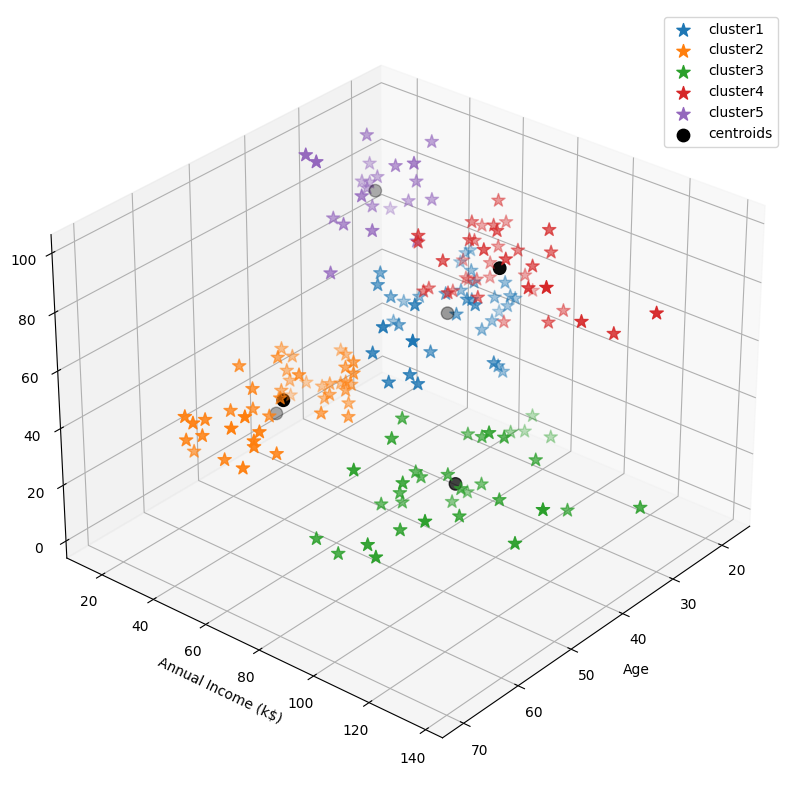

In [29]:
# build a model with n_clusters =6
km = KMeans(n_clusters=6, random_state=0)
y_km = km.fit_predict(X)

# create a fig object
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection="3d")


# draw a 3D scatter plot
for n in range(5):
    ax.scatter3D(X[y_km == n, 0], X[y_km == n, 1], X[y_km == n, 2], s=100, marker="*", label="cluster"+str(n+1))
ax.scatter3D(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], s=80, marker="o", c="black", label="centroids")
ax.legend()
plt.xlabel(Age)
plt.ylabel(Income)
# rotate a graph
ax.view_init(elev=30, azim=40) #elev:vetical、azim:horizonal